<a href="https://colab.research.google.com/github/BlackHole3344/FineTune/blob/main/PaligemmaFIntune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import requests
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

model = PaliGemmaForConditionalGeneration.from_pretrained("google/PaliGemma-test-224px-hf")
processor = AutoProcessor.from_pretrained("google/PaliGemma-test-224px-hf")

prompt = "whats in the image"
url = "https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-mediumSquareAt3X-v2.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, text=prompt,  return_tensors="pt")

# Generate
generate_ids = model.generate(**inputs, max_length=30)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: google/PaliGemma-test-224px-hf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [15]:
!pip install huggingface.login

ERROR: Could not find a version that satisfies the requirement huggingface.login (from versions: none)
ERROR: No matching distribution found for huggingface.login


In [14]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `FineTune2` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `FineTune

In [ ]:
from transformers import (
    PaliGemmaProcessor,
    PaliGemmaForConditionalGeneration,
)
from transformers.image_utils import load_image
import torch

model_id = "google/paligemma2-3b-pt-224"

url = "https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-mediumSquareAt3X-v2.jpg"
image = load_image(url)

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto").eval()
processor = PaliGemmaProcessor.from_pretrained(model_id)

# Leaving the prompt blank for pre-trained models
prompt = "whats in the image"
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


cat


In [17]:
!pip install -q --upgrade git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
url = "https://d6xcmfyh68wv8.cloudfront.net/blog-content/uploads/2023/04/bill-of-exchange-format-1.png"
image = load_image(url)

prompt = "list all the content in bill"
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)




You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


sample bill of exchange


In [4]:
!pip install -q peft bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 13.6 MB/s eta 0:00:00


In [5]:
!pip install -q datasets lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
!pip install -q wandb

In [8]:
from datasets import load_dataset


In [ ]:
from PIL import Image

In [16]:
import json

In [11]:
REPO_ID = "google/paligemma-3b-pt-224"
FINETUNED_MODEL_ID = "nielsr/paligemma-cord-demo"
MAX_LENGTH = 512
WANDB_PROJECT = "paligemma"
WANDB_NAME = "cord-demo"

In [9]:
from torch.utils.data import Dataset
import random



class CreateDataset() :


  def __init__ (self , dataset_name : str , split : str = "train" , sort_json_key : bool = True) :
    super().__init__()
    self.split = split
    self.sort_json_key = sort_json_key
    self.dataset = load_dataset(path = dataset_name , split=self.split)

    self.dataset_length = len(self.dataset)
    self.tokens_sequence = []

    for i , sample in enumerate(self.dataset) :
      ground_truth = json.loads(sample["ground_truth"])

      if "gt_parses" in ground_truth :
        assert isinstance(ground_truth , list)
        gt_jsons = ground_truth["gt_parse"]
      else :
        assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"] , dict)
        gt_jsons = [ground_truth["gt_parse"]]

      self.tokens_sequence.append([
          self.jsontotoken(
              gt_json ,
              self.sort_json_key
          ) for gt_json in gt_jsons
      ])


  def jsontotoken(self , obj : any , sort_json_key : bool = True) :

    if type(obj) == dict :

      if len(obj) == 1 and "text_sequence" in obj :
        return obj["text_sequence"]
      else :
        output =  ""
        if sort_json_key :
          keys = sorted(obj.keys() , reverse = True)
        else :
          keys = obj.keys()
        for k in keys :
          output += (
              fr"<s_{k}>"
              + self.jsontotoken(obj[k] , sort_json_key)
              + fr"</s_{k}>"
          )
          return output
    elif type(obj) == list:
        return r"<sep/>".join(
            [self.jsontotoken(item, sort_json_key) for item in obj]
        )
    else:
        obj = str(obj)
        return obj


  def __len__(self ) -> int :
    return self.dataset_length

  def __getitem__(self , idx : int ) :

    sample = self.dataset[idx]


    image = sample["image"]

    seq = random.choice(self.tokens_sequence[idx])

    return image , seq



In [34]:
train_data = CreateDataset("naver-clova-ix/cord-v2" , split="train")

In [80]:
valid_data = CreateDataset("naver-clova-ix/cord-v2" , split="validation")

In [24]:
from PIL import Image
import requests

In [3]:
from transformers import AutoProcessor

In [17]:
processor = AutoProcessor.from_pretrained(REPO_ID)

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [25]:
import io
url = "https://media.4-paws.org/d/2/5/f/d25ff020556e4b5eae747c55576f3b50886c0b90/cut%20cat%20serhio%2002-1813x1811-720x719.jpg"

reponse = requests.get(url)
image = Image.open(io.BytesIO(reponse.content))

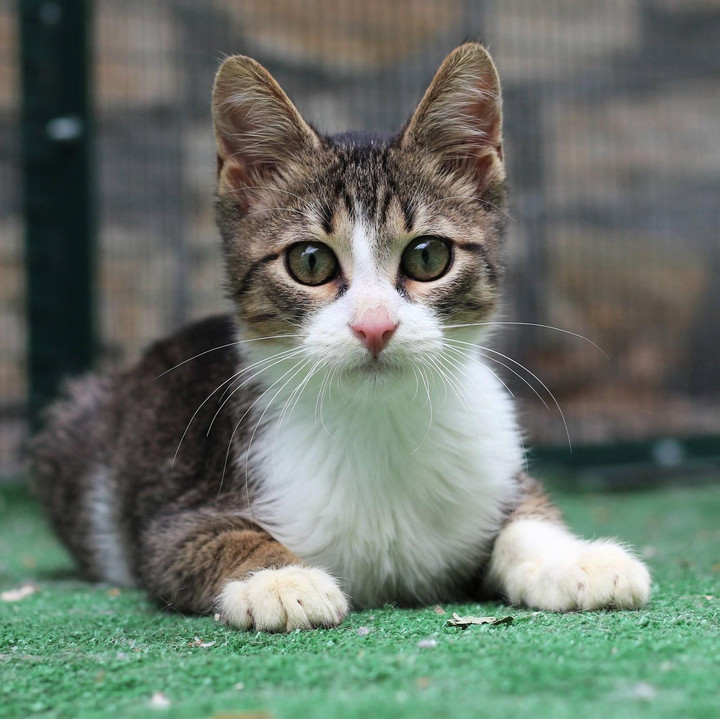

In [26]:
image

In [48]:
for i in range(10) :
  print(train_data[i])


(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7A1E22303F50>, '<s_total><s_total_price>1,591,600</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7A1E22301190>, '<s_total><s_total_price>580,965</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280 at 0x7A1E22303410>, '<s_total><s_total_price>334,000</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1108x1478 at 0x7A1E22303350>, '<s_total><s_total_price>302,016</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7A1E21E9DA90>, '<s_total><s_total_price>48.000</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=2304x4096 at 0x7A1E21E9FF10>, '<s_total><s_total_price>261,333</s_total_price></s_total>')
(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7A1E2241F710>, '<s_total><s_total_price>61,799</s_total_price></s

FileNotFoundError: [Errno 2] No such file or directory: '<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7A1E22303F50>'

In [35]:
from torch.utils.data import DataLoader

In [70]:
PROMPT = "extract JSON."

def image_collate(examples) :
  images = [example[0] for example in examples]
  labels = [example[1] for example in examples]
  texts = [PROMPT for _ in range(len(images))]

  # print(len(prompts))

  # print(len(images))

  processed_image = processor(text = texts , images=images , suffix=labels , return_tensors="pt" ,padding=True,
                     truncation="only_second", max_length=MAX_LENGTH,
                     tokenize_newline_separately=False)

  input_ids = processed_image["input_ids"]
  token_type_ids = processed_image["token_type_ids"]
  attention_mask = processed_image["attention_mask"]
  pixel_values = processed_image["pixel_values"]
  labels = processed_image["labels"]

  return input_ids, token_type_ids, attention_mask, pixel_values, labels

def eval_collate_fn(examples):
  images = [example[0] for example in examples]
  texts = [PROMPT for _ in range(len(images))]
  answers = [example[1] for example in examples]

  inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, tokenize_newline_separately=False)

  input_ids = inputs["input_ids"]
  attention_mask = inputs["attention_mask"]
  pixel_values = inputs["pixel_values"]

  return input_ids, attention_mask, pixel_values, answers




In [61]:
from torch.utils.data import DataLoader

PROMPT = "extract JSON."

def train_collate_fn(examples):
  images = [example[0] for example in examples]
  texts = [PROMPT for _ in range(len(images))]
  labels = [example[1] for example in examples]

  inputs = processor(text=texts, images=images, suffix=labels, return_tensors="pt", padding=True,
                     truncation="only_second", max_length=MAX_LENGTH,
                     tokenize_newline_separately=False)

  input_ids = inputs["input_ids"]
  token_type_ids = inputs["token_type_ids"]
  attention_mask = inputs["attention_mask"]
  pixel_values = inputs["pixel_values"]
  labels = inputs["labels"]

  return input_ids, token_type_ids, attention_mask, pixel_values, labels


def eval_collate_fn(examples):
  images = [example[0] for example in examples]
  texts = [PROMPT for _ in range(len(images))]
  answers = [example[1] for example in examples]

  inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, tokenize_newline_separately=False)

  input_ids = inputs["input_ids"]
  attention_mask = inputs["attention_mask"]
  pixel_values = inputs["pixel_values"]

  return input_ids, attention_mask, pixel_values, answers

In [71]:
train_dataloader = DataLoader(train_data , batch_size=2 , collate_fn=image_collate , shuffle=True)

input_ids, token_type_ids, attention_mask, pixel_values, labels = next(iter(train_dataloader))

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


In [77]:
processor.batch_decode(input_ids) , input_ids.size()

(['<image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><im

In [79]:
for id, label in zip(input_ids[0][-30:], labels[0][-30:]):
  print(processor.decode([id.item()]), processor.decode([label.item()]))

< <
s s
_ _
total total
>< ><
s s
_ _
total total
_ _
price price
> >
2 2
3 3
7 7
, ,
9 9
9 9
7 7
</ </
s s
_ _
total total
_ _
price price
></ ></
s s
_ _
total total
> >
<eos> <eos>


In [ ]:
# validation_dataloader

validation_dataloader = DataLoader()

In [ ]:
####pytorch lighting trainer setup

